In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/event-recommendation-engine-challenge/event_attendees.csv.gz
/kaggle/input/event-recommendation-engine-challenge/users.csv
/kaggle/input/event-recommendation-engine-challenge/user_friends.csv.gz
/kaggle/input/event-recommendation-engine-challenge/event_popularity_benchmark_private_test_only.csv
/kaggle/input/event-recommendation-engine-challenge/public_leaderboard_solution.csv
/kaggle/input/event-recommendation-engine-challenge/event_popularity_benchmark.csv
/kaggle/input/event-recommendation-engine-challenge/events.csv.gz
/kaggle/input/event-recommendation-engine-challenge/random_benchmark.csv
/kaggle/input/event-recommendation-engine-challenge/train.csv
/kaggle/input/event-recommendation-engine-challenge/test.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# TRAIN DATASET

In [4]:
train_df = pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/train.csv')
train_df.head()

,user,event,invited,timestamp,interested,not_interested
0,3044012,1918771225,0,2012-10-02 15:53:05.754000+00:00,0,0
1,3044012,1502284248,0,2012-10-02 15:53:05.754000+00:00,0,0
2,3044012,2529072432,0,2012-10-02 15:53:05.754000+00:00,1,0
3,3044012,3072478280,0,2012-10-02 15:53:05.754000+00:00,0,0
4,3044012,1390707377,0,2012-10-02 15:53:05.754000+00:00,0,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15398 entries, 0 to 15397
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user            15398 non-null  int64 
 1   event           15398 non-null  int64 
 2   invited         15398 non-null  int64 
 3   timestamp       15398 non-null  object
 4   interested      15398 non-null  int64 
 5   not_interested  15398 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 721.9+ KB


<Axes: >

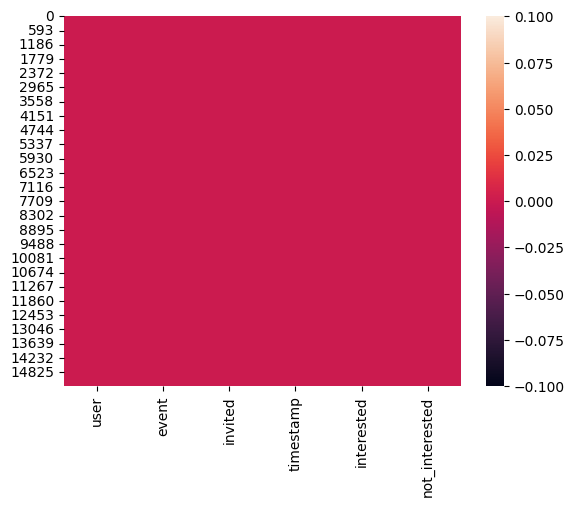

In [6]:
sns.heatmap(train_df.isnull())

In [7]:
print("Unique events: ", train_df.event.unique())
print("Total no. of unique events: ",len(train_df.event.unique()))

Unique events:  [1918771225 1502284248 2529072432 ...  598708806  604179853 2351245308]
Total no. of unique events:  8846


In [8]:
# No. of users interested in each event
train_df.event[train_df['interested']==1].value_counts()

event
955398943     118
2529072432     94
1076364848     69
1600413013     59
952519340      55
             ... 
2973911742      1
2485271797      1
1389265162      1
706344711       1
2351245308      1
Name: count, Length: 2623, dtype: int64

In [9]:
# No. of invited users in each event
train_df.event[train_df['invited']==1].value_counts()

event
2007279414    10
1269035551     6
675888033      5
955398943      4
2153037761     3
              ..
636474096      1
1556245473     1
1913655491     1
2032868245     1
2072616125     1
Name: count, Length: 590, dtype: int64

# EVENTS DATASET

In [10]:
events = pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/events.csv.gz', compression = 'gzip')
events.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,event_id,user_id,start_time,city,state,zip,country,lat,lng,c_1,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
0,684921758,3647864012,2012-10-31T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,1,0,0,0,0,0,0,0,9
1,244999119,3476440521,2012-11-03T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,2,...,0,0,0,0,0,0,0,0,0,7
2,3928440935,517514445,2012-11-05T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,0,12
3,2582345152,781585781,2012-10-30T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,8
4,1051165850,1016098580,2012-09-27T00:00:00.001Z,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,0,0,0,0,0,9


The final 101 columns represent the 100 most frequent word stems (identified using Porter Stemming) found in the names or descriptions of a large random sample of our events. These columns are labeled count_1, count_2, ..., count_100, and count_other. Each count_N indicates how many times the Nth most frequent word stem appears in the name or description of a given event. The count_other column tallies all other word stems not included among the top 100.


In [11]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137972 entries, 0 to 3137971
Columns: 110 entries, event_id to c_other
dtypes: float64(2), int64(103), object(5)
memory usage: 2.6+ GB


In [12]:
events.describe()

,event_id,user_id,lat,lng,c_1,c_2,c_3,c_4,c_5,c_6,...,c_92,c_93,c_94,c_95,c_96,c_97,c_98,c_99,c_100,c_other
count,3.137972e+06,3.137972e+06,1.806092e+06,1.806092e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,...,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06,3.137972e+06
mean,2.147180e+09,2.114831e+09,3.393515e+01,-5.748120e+01,2.324834e+00,1.692952e+00,1.451996e+00,1.071046e+00,1.051598e+00,9.937807e-01,...,7.908739e-02,8.298417e-02,6.359872e-02,8.168365e-02,7.978465e-02,7.888503e-02,7.959695e-02,7.917598e-02,7.789649e-02,4.173811e+01
std,1.239951e+09,1.264534e+09,1.897208e+01,6.540928e+01,4.095202e+00,2.845647e+00,2.612183e+00,1.904300e+00,2.283144e+00,3.456083e+00,...,3.426288e-01,3.665797e-01,3.011689e-01,3.286883e-01,3.926603e-01,1.068604e+00,3.399542e-01,4.278229e-01,3.453929e-01,4.939340e+01
min,9.200000e+01,5.660000e+02,-8.615100e+01,-1.764570e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.073168e+09,9.866086e+08,3.286500e+01,-9.714500e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01
50%,2.147012e+09,2.104379e+09,3.964100e+01,-7.946400e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01
75%,3.220719e+09,3.216721e+09,4.335900e+01,-4.764750e+00,3.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.500000e+01
max,4.294964e+09,4.294966e+09,7.821800e+01,1.793170e+02,2.186000e+03,3.010000e+02,2.530000e+02,2.080000e+02,1.801000e+03,5.050000e+02,...,2.000000e+01,2.500000e+01,9.100000e+01,2.100000e+01,4.500000e+01,1.801000e+03,1.900000e+01,3.600000e+01,4.100000e+01,9.664000e+03


In [13]:
events.event_id.value_counts().sum()

3137972

In [14]:
events.isnull().sum()

event_id            0
user_id             0
start_time          0
city          1557125
state         1889723
               ...   
c_97                0
c_98                0
c_99                0
c_100               0
c_other             0
Length: 110, dtype: int64

In [15]:
print(events.city.value_counts())

city
New York                                         43009
Toronto                                          32023
Los Angeles                                      27831
Chicago                                          21390
London                                           21187
                                                 ...  
North Vancouver (Vancouver)  British Columbia        1
Plainedge                                            1
Bargoed                                              1
Ingalls                                              1
MECHANICSBURG  Pennsylvania                          1
Name: count, Length: 31646, dtype: int64


In [31]:
sample_fraction = 0.5  # sampling 50% of the events
events_sampled = events.sample(frac=sample_fraction, random_state=42)

# Optional: Reset the index
events_sampled = events_sampled.reset_index(drop=True)

# Save the sampled dataframe to a new CSV
events_sampled.to_csv('events_sampled_50.csv', index=False)

print(f"Original size: {events.shape[0]} rows")
print(f"Sampled size: {events_sampled.shape[0]} rows")

Original size: 3137972 rows
Sampled size: 1568986 rows


In [32]:
sample_fraction = 0.25  # sampling 25% of the events
events_sampled = events.sample(frac=sample_fraction, random_state=42)

# Optional: Reset the index
events_sampled = events_sampled.reset_index(drop=True)

# Save the sampled dataframe to a new CSV
events_sampled.to_csv('events_sampled_25.csv', index=False)

print(f"Original size: {events.shape[0]} rows")
print(f"Sampled size: {events_sampled.shape[0]} rows")

Original size: 3137972 rows
Sampled size: 784493 rows


# EVENT ATTENDEES

In [16]:
event_attendees = pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/event_attendees.csv.gz', compression= 'gzip')
event_attendees.head()

,event,yes,maybe,invited,no
0,1159822043,1975964455 252302513 4226086795 3805886383 142...,2733420590 517546982 1350834692 532087573 5831...,1723091036 3795873583 4109144917 3560622906 31...,3575574655 1077296663
1,686467261,2394228942 2686116898 1056558062 3792942231 41...,1498184352 645689144 3770076778 331335845 4239...,1788073374 733302094 1830571649 676508092 7081...,NaN
2,1186208412,NaN,3320380166 3810793697,1379121209 440668682,1728988561 2950720854
3,2621578336,NaN,NaN,NaN,NaN
4,855842686,2406118796 3550897984 294255260 1125817077 109...,2671721559 1761448345 2356975806 2666669465 10...,1518670705 880919237 2326414227 2673818347 332...,3500235232


In [17]:
event_attendees.shape

(24144, 5)

In [20]:
event_attendees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24144 entries, 0 to 24143
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   event    24144 non-null  int64 
 1   yes      22160 non-null  object
 2   maybe    20977 non-null  object
 3   invited  22322 non-null  object
 4   no       17485 non-null  object
dtypes: int64(1), object(4)
memory usage: 943.2+ KB


<Axes: >

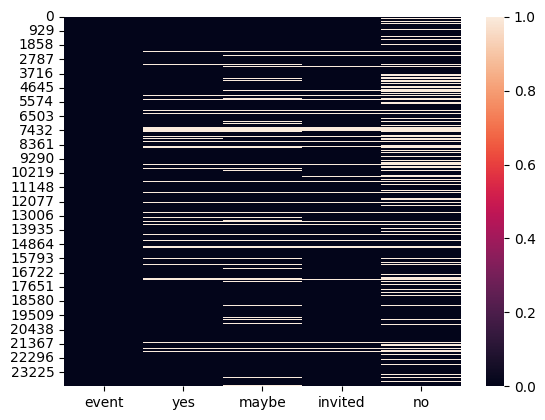

In [22]:
sns.heatmap(event_attendees.isnull())

In [23]:
event_attendees.isnull().sum()

event         0
yes        1984
maybe      3167
invited    1822
no         6659
dtype: int64

# USER FRIENDS DATASET

In [25]:
user_friends = pd.read_csv('/kaggle/input/event-recommendation-engine-challenge/user_friends.csv.gz', compression= 'gzip')
user_friends.head()

,user,friends
0,3197468391,1346449342 3873244116 4226080662 1222907620 54...
1,3537982273,1491560444 395798035 2036380346 899375619 3534...
2,823183725,1484954627 1950387873 1652977611 4185960823 42...
3,1872223848,83361640 723814682 557944478 1724049724 253059...
4,3429017717,4253303705 2130310957 1838389374 3928735761 71...


In [26]:
user_friends.shape

(38202, 2)

In [27]:
user_friends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38202 entries, 0 to 38201
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user     38202 non-null  int64 
 1   friends  38063 non-null  object
dtypes: int64(1), object(1)
memory usage: 597.0+ KB


In [28]:
user_friends.isnull().sum()

user         0
friends    139
dtype: int64